## Implementação do artigo, visando um melhor entendimento para criação de um tutorial adequado para aqueles que pretendem reproduzí-lo.

### **Título:**
## Training and Meta-Training Binary Neural Networks with Quantum Computing

### **Autores:**
Fawaz, Abdulah, et al.

### **Grupo que criou o resumo e tutorial:**
André, Daivid e Felipe


## Inicializando o qiskit e verificando os backends disponíveis.

In [1]:
## matplotlib to see the circuits
%matplotlib inline
## qiskit standart
from qiskit import *

In [2]:
## See available eviroments
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>]

### **Vamos tentar montar o circuito do perceptron que foi apresentado no artigo**

Temos 1 perceptron que tem 3 entradas e uma saída, logo:

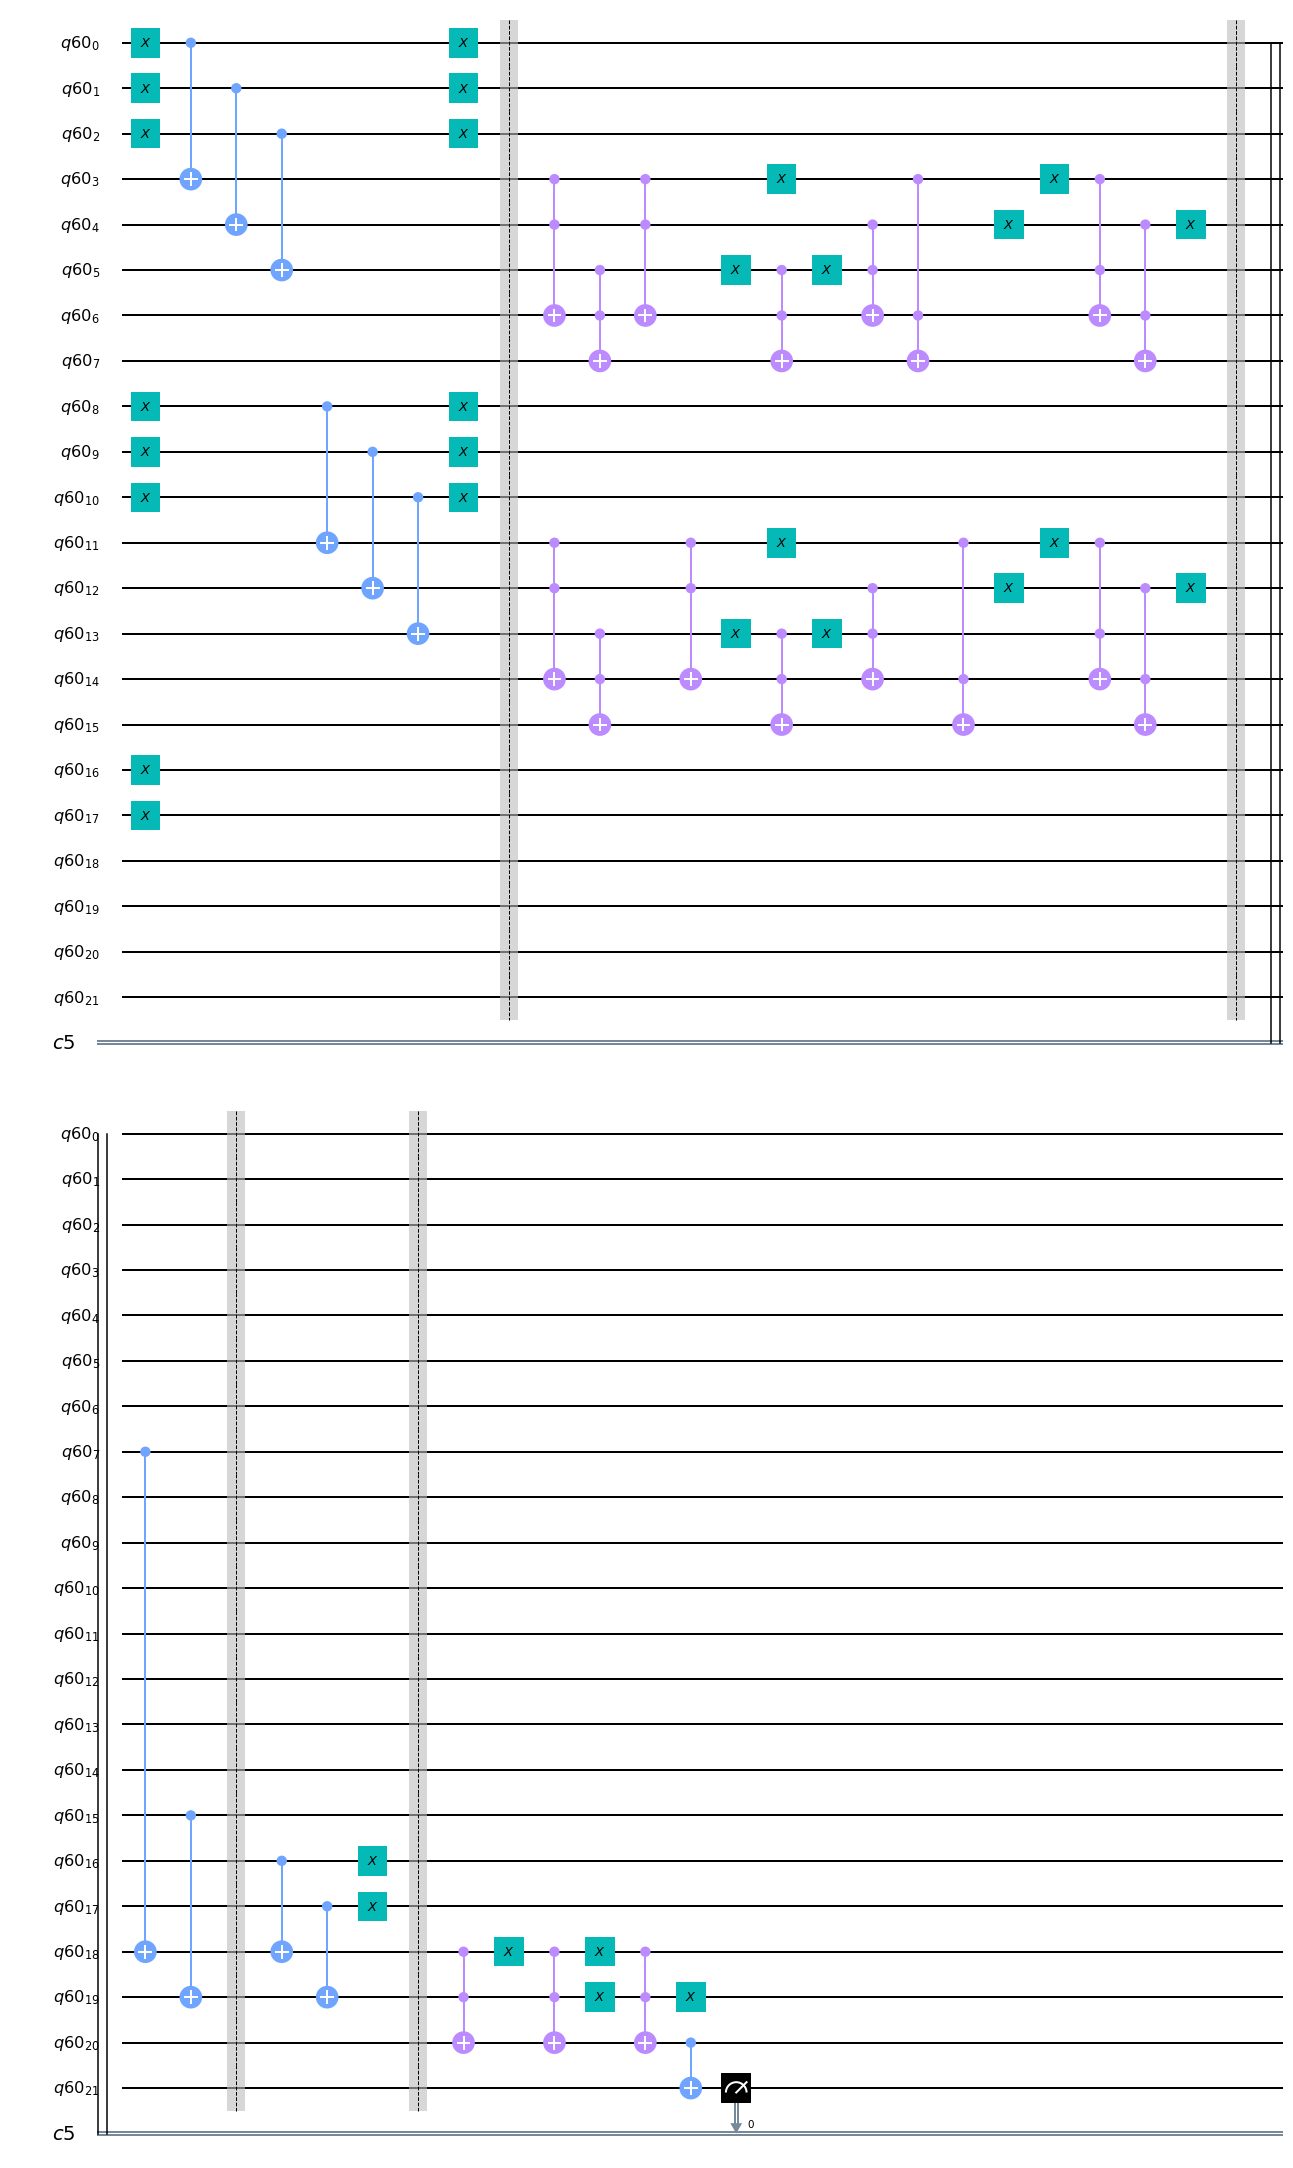

In [69]:
# Array com 8 bits quânticos
# Os 3 [0 - 2] primeiros representam pesos
# Os 3 seguintes [3 - 5] representam inputs
# O penúltimo uma ancila e o último o qubit resultante
# Note que o Qubit resultante é o resultado após a função de ativação

# Supondo que os valores iniciais são |0>
qWI = QuantumRegister(22)
c = ClassicalRegister(1)
# Construindo o circuito
circuit = qiskit.QuantumCircuit(qWI, c)

# Definindo a multiplicação de um peso por uma entrada.
def multiplyWeightInput(circuit, x, y):
    #circuit.h(x)
    circuit.x(x)
    circuit.cx(x, y)
    circuit.x(x)

# Essa função cria a majority definida no artigo para um perceptron com 3 entradas.
def activationFunction(circuit, listaQubit):
    circuit.ccx(listaQubit[0], listaQubit[1], listaQubit[3])
    circuit.ccx(listaQubit[2], listaQubit[3], listaQubit[4])
    #circuit.barrier()
    circuit.ccx(listaQubit[0], listaQubit[1], listaQubit[3])
    circuit.x(listaQubit[2])
    circuit.ccx(listaQubit[2], listaQubit[3], listaQubit[4])
    circuit.x(listaQubit[2])
    #circuit.barrier()
    circuit.ccx(listaQubit[1], listaQubit[2], listaQubit[3])
    circuit.x(listaQubit[0])
    circuit.ccx(listaQubit[0], listaQubit[3], listaQubit[4])
    circuit.x(listaQubit[0])
    #circuit.barrier()
    circuit.ccx(listaQubit[0], listaQubit[2], listaQubit[3])
    circuit.x(listaQubit[1])
    circuit.ccx(listaQubit[1], listaQubit[3], listaQubit[4])
    circuit.x(listaQubit[1])
    #circuit.barrier()
    

# Então, aqui temos a implementação de um perceptron com 3 entradas.
multiplyWeightInput(circuit, qWI[0], qWI[3])
multiplyWeightInput(circuit, qWI[1], qWI[4])
multiplyWeightInput(circuit, qWI[2], qWI[5])
# Vejamos o segundo perceptron que também tem 3 entradas.
multiplyWeightInput(circuit, qWI[8], qWI[11])
multiplyWeightInput(circuit, qWI[9], qWI[12])
multiplyWeightInput(circuit, qWI[10], qWI[13])

# utilizando a multiplicação de maneira diferente para otimizar o circuito.
#circuit.h(qWI[16:18])
circuit.x(qWI[16:18])
circuit.barrier()

activationFunction(circuit, qWI[3:8])
activationFunction(circuit, qWI[11:16])
circuit.barrier()

circuit.cx(qWI[7], qWI[18])
circuit.cx(qWI[15], qWI[19])
circuit.barrier()

circuit.cx(qWI[16],qWI[18])
circuit.cx(qWI[17],qWI[19])
circuit.x(qWI[16:18])
circuit.barrier()

circuit.ccx(qWI[18], qWI[19], qWI[20])
circuit.x(qWI[18])
circuit.ccx(qWI[18], qWI[19], qWI[20])
circuit.x(qWI[18])
circuit.x(qWI[19])
circuit.ccx(qWI[18], qWI[19], qWI[20])
circuit.x(qWI[19])

circuit.cx(qWI[20],qWI[21])

circuit.measure(qWI[21], c[0])

# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

In [70]:
#EXECUTANDO o circuito
backend = BasicAer.get_backend('qasm_simulator')
job = qiskit.execute(circuit, backend, shots=1024)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'0': 1024}
